/tmp/ipykernel_2104968/2522981170.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score_bin'] = pd.cut(df['score'], bins=np.linspace(0, 1, num_bins+1), labels=False, include_lowest=True)
/tmp/ipykernel_2104968/2522981170.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score_bin'] = pd.cut(df['score'], bins=np.linspace(0, 1, num_bins+1), labels=False, include_lowest=True)


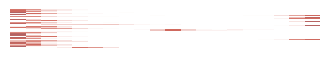

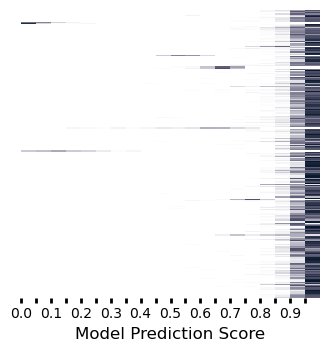

In [5]:
# Import required libraries
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colormaps as cmaps
import seaborn as sns

# Create custom colormaps
color1 = cmaps.lipari[0].colors
color2 = cmaps.lipari[75].colors
unicolor_colormap = LinearSegmentedColormap.from_list("custom_palette", ['white', color2, color1], N=256)

color1 = cmaps.lipari[135].colors 
color2 = cmaps.lipari[155].colors
unicolor_colormap_reds = LinearSegmentedColormap.from_list("custom_palette", ['white', color2, color1], N=256)

# Read data
ecoli_results = pd.read_csv('fig2c.csv')

# Plot first heatmap (true_label = 0)
fig, ax = plt.subplots(1, 1, figsize=(3.4, 0.69))
df = ecoli_results.loc[ecoli_results['true_label'] == 0]

# Create score bins
num_bins = 20
df['score_bin'] = pd.cut(df['score'], bins=np.linspace(0, 1, num_bins+1), labels=False, include_lowest=True)

# Create and sort heatmap data
heatmap_data = df.pivot_table(
    index='knockout_name',
    columns='score_bin',
    aggfunc='size',
    fill_value=0
)
df_sorted = df.sort_values(by=['true_label', 'knockout_name'])
heatmap_data = heatmap_data.reindex(df_sorted['knockout_name'].unique())

# Plot heatmap (true_label == 0)
sns.heatmap(heatmap_data, cmap=unicolor_colormap_reds, cbar=False, ax=ax)
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.xlabel('')
fig.tight_layout()

# Plot second heatmap (true_label = 1)
fig, ax = plt.subplots(1, 1, figsize=(3.4, 3.62))
df = ecoli_results.loc[ecoli_results['true_label'] == 1]

# Create score bins
df['score_bin'] = pd.cut(df['score'], bins=np.linspace(0, 1, num_bins+1), labels=False, include_lowest=True)

# Create and sort heatmap data
heatmap_data = df.pivot_table(
    index='knockout_name',
    columns='score_bin',
    aggfunc='size',
    fill_value=0
)
df_sorted = df.sort_values(by=['true_label', 'knockout_name'])
heatmap_data = heatmap_data.reindex(df_sorted['knockout_name'].unique())

# Plot heatmap with labels
sns.heatmap(heatmap_data, cmap=unicolor_colormap, cbar=False, ax=ax)
plt.xlabel('Model Prediction Score', fontsize=12)
plt.ylabel('')
plt.xticks(ticks=np.arange(num_bins), 
           labels=[f'{i:.1f}' if index % 2 == 0 else '' for index, i in enumerate(np.linspace(0, 1, num_bins))], 
           fontsize=10)
ax.xaxis.set_tick_params(width=2, labelsize=10)
ax.spines['bottom'].set_linewidth(6)
plt.yticks([])
fig.tight_layout()

/tmp/ipykernel_2104968/3903015388.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['', 0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=10)
/tmp/ipykernel_2104968/3903015388.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['', 0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=10)
/tmp/ipykernel_2104968/3903015388.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['', 0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=10)
/tmp/ipykernel_2104968/3903015388.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['', 0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=10)
/tmp/ipykernel_2104968/3903015388.py:51: UserWarning

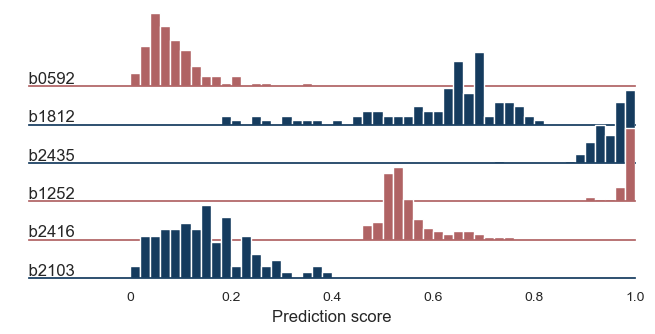

In [ ]:
from random import sample as ssample
import matplotlib.patches as mpatches

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

def plot_hists_stacked(sample_data, overlap=0.25, bbox_legend=1.5, size=(7.32, 6.03)):
    # Get unique knockouts and count
    knockouts = sample_data.knockout_name.unique()
    x = len(knockouts)

    # Create histogram bins
    bins = np.histogram(sample_data.score, bins=50)[1]
    
    # Create subplots
    fig, axs = plt.subplots(x, 1, figsize=size, sharex=True)
    
    # Plot histogram for each knockout
    for i in range(len(axs)):
        k_plot_data = sample_data.loc[sample_data.knockout_name == knockouts[i]]
        ax = axs[i]
        
        # Set color based on essential/nonessential
        c = cmaps.lipari[135].colors if k_plot_data.true_label.mean() < 0.5 else cmaps.lipari[30].colors
        
        # Create histogram and style plot
        ax.hist(k_plot_data.score, bins, color=c)
        ax.set_yticklabels('')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_color(c)
        ax.set_ylabel('    '+k_plot_data.knockout_name.unique()[0], rotation=0, loc='bottom', fontsize=12)
        ax.set_xlim([-0.2, 1.0])
        ax.set_xticklabels(['', 0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=10)
    
    # Adjust layout
    fig.tight_layout()
    fig.subplots_adjust(hspace=-overlap)
    axs[i].set_xlabel('Prediction score')
    plt.show()

# Specify representative knockouts and create plot
wrong_essential = ['b2416', 'b1252']
right_essential = ['b0592'] 
wrong_nonessential = ['b2103']
right_nonessential = ['b2435', 'b1812']

plot_data = pd.DataFrame()
for w in (right_essential, right_nonessential, wrong_essential, wrong_nonessential):
    plot_data = pd.concat([plot_data, ecoli_results.loc[ecoli_results.knockout_name.isin(w)]])
    
plot_hists_stacked(plot_data, overlap=0.5, bbox_legend=8.2, size=(6.71, 3.3))